### CASE STUDY-BANKING

### CREDIT CARD SPEND PREDICTION & IDENTIFY DRIVERS FOR SPEND

### Business Problem:

One of the global banks would like to understand what factors driving credit card spend are. The bank want use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data.

The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pandas_profiling 
import pandas_profiling 
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [2]:
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Importing DataSet

In [3]:
credit_card = pd.read_excel('Data Set.xlsx')

In [4]:
credit_card.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [5]:
# Preliminary analysis of data.

In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [7]:
credit_card.describe(percentiles=[.01,.05,.25,.5,.75,.9,.95,.99])

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,1.000000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.00000,1.000000,0.000000,18.000000,2.000000,8.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,1.00000,1.000000,0.000000,20.000000,2.000000,9.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,4.000000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
90%,5.00000,5.000000,1.000000,72.000000,6.000000,19.000000,4.000000,6.0000,1.00000,25.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [8]:
credit_card.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

### Advanced data analysis using pandas profiling library

In [9]:
#Detailed profiling using pandas profiling

output = pandas_profiling.ProfileReport(credit_card)
output

C:\Users\nanda\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,130
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,59
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,20


In [10]:
#Datatypes of given features of dataset.
print(credit_card.dtypes)

custid          object
region           int64
townsize       float64
gender           int64
age              int64
                ...   
ownfax           int64
news             int64
response_01      int64
response_02      int64
response_03      int64
Length: 130, dtype: object


### Exploratory Data Analysis

In [11]:
# As per the initial analysis of data and business problem we are dropping few variables which are unnecessary.

In [12]:
credit_card.drop(columns=['custid','birthmonth'],inplace=True)

In [13]:
credit_card.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=128)

### Creating variable to calculate total spend using two different credit cards

In [14]:
# Calculating cards spent by using two different card types spent 
credit_card['total_spend']=credit_card.cardspent+credit_card.card2spent
credit_card.total_spend.head()

0    149.46
1     77.54
2    359.97
3    359.41
4    507.83
Name: total_spend, dtype: float64

In [15]:
# Dropping variables like cardspent and card2spent
credit_card.drop(columns=['cardspent','card2spent'],inplace=True)

### Identifying categorical and numerical variables based on the Data Dictionary

In [16]:
#Defining categorical variables
for x in ['region','gender','jobcat', 'union','retire','default','marital','homeown','hometype','carown','cartype','carcatvalue','carbought','carbuy',
                 'commute','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute',
                 'reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee',
                 'card2','card2type','card2benefit','card2fee',
                 'active','bfast','churn','tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']:
    credit_card[x] = credit_card[x].astype('object')

In [17]:
dict(credit_card.dtypes)

{'region': dtype('O'),
 'townsize': dtype('float64'),
 'gender': dtype('O'),
 'age': dtype('int64'),
 'agecat': dtype('int64'),
 'ed': dtype('int64'),
 'edcat': dtype('int64'),
 'jobcat': dtype('O'),
 'union': dtype('O'),
 'employ': dtype('int64'),
 'empcat': dtype('int64'),
 'retire': dtype('O'),
 'income': dtype('int64'),
 'lninc': dtype('float64'),
 'inccat': dtype('int64'),
 'debtinc': dtype('float64'),
 'creddebt': dtype('float64'),
 'lncreddebt': dtype('float64'),
 'othdebt': dtype('float64'),
 'lnothdebt': dtype('float64'),
 'default': dtype('O'),
 'jobsat': dtype('int64'),
 'marital': dtype('O'),
 'spoused': dtype('int64'),
 'spousedcat': dtype('int64'),
 'reside': dtype('int64'),
 'pets': dtype('int64'),
 'pets_cats': dtype('int64'),
 'pets_dogs': dtype('int64'),
 'pets_birds': dtype('int64'),
 'pets_reptiles': dtype('int64'),
 'pets_small': dtype('int64'),
 'pets_saltfish': dtype('int64'),
 'pets_freshfish': dtype('int64'),
 'homeown': dtype('O'),
 'hometype': dtype('O'),
 'a

In [18]:
numeric_var_names=[key for key in dict(credit_card.dtypes) if dict(credit_card.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit_card.dtypes) if dict(credit_card.dtypes)[key] in ['object', 'O']]

In [19]:
print(numeric_var_names)

['townsize', 'age', 'agecat', 'ed', 'edcat', 'employ', 'empcat', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'jobsat', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'address', 'addresscat', 'cars', 'carvalue', 'commutetime', 'cardtenure', 'cardtenurecat', 'card2tenure', 'card2tenurecat', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'total_spend']


In [20]:
print(cat_var_names)

['region', 'gender', 'jobcat', 'union', 'retire', 'default', 'marital', 'homeown', 'hometype', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'card2', 'card2type', 'card2benefit', 'card2fee', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']


In [21]:
#Creating separate dataframe for numeric type variables.
credit_card_num=credit_card[numeric_var_names]
credit_card_num.head(5)

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
0,2.0,20,2,15,3,0,1,31,3.433987,2,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,5.0,22,2,17,4,0,1,15,2.708050,1,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,4.0,67,6,14,2,16,5,35,3.555348,2,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,3.0,23,2,16,3,0,1,20,2.995732,1,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,2.0,26,3,16,3,1,1,23,3.135494,1,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [22]:
#Creating dataframe for categorical type variables.
credit_card_cat = credit_card[cat_var_names]
credit_card_cat.head(5)

,region,gender,jobcat,union,retire,default,marital,homeown,hometype,carown,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,1,1,1,0,1,0,0,2,1,...,0,0,0,1,1,0,0,0,1,0
1,5,0,2,0,0,1,0,1,3,1,...,1,1,1,1,1,1,1,0,0,0
2,3,1,2,0,0,0,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
3,4,0,2,0,0,1,1,1,3,1,...,1,0,1,1,1,0,1,1,0,0
4,2,0,2,0,0,0,1,0,2,0,...,1,0,1,0,1,0,0,0,1,0


In [23]:
#user defined function in python
def test_summary(x):
    mean = x.mean()
    sum = x.sum()
    std = x.std()
    return pd.Series([mean, sum, std], index=['avg', 'total', 'std'])

In [24]:
#Summary of functions applied on total spend.
pd.set_option('display.float_format', lambda x: '%.6f' % x)
test_summary(credit_card_num.total_spend)

avg         498.078630
total   2490393.150000
std         351.529270
dtype: float64

In [25]:
#Summary of functions applied on numerical type variables of given dataset.
pd.set_option('display.float_format', lambda x: '%.6f' % x)
credit_card_num.apply(test_summary).T

,avg,total,std
townsize,2.687275,13431.000000,1.425925
age,47.025600,235128.000000,17.770338
agecat,4.238800,21194.000000,1.308785
ed,14.543000,72715.000000,3.281083
edcat,2.672000,13360.000000,1.211738
employ,9.730400,48652.000000,9.690929
empcat,2.932600,14663.000000,1.453300
income,54.759600,273798.000000,55.377511
lninc,3.699909,18499.546992,0.747072
inccat,2.392200,11961.000000,1.221261


In [26]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [27]:
#Applying general function on the numerical variables dataset.
credit_card_num.apply(var_summary)

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
N,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,3581.000000,4998.000000,3578.000000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000
NMISS,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1419.000000,2.000000,1422.000000,0.000000,3656.000000,0.000000,3656.000000,0.000000,0.000000
SUM,13431.000000,235128.000000,21194.000000,72715.000000,13360.000000,48652.000000,14663.000000,273798.000000,18499.546992,11961.000000,...,77219.250000,10419.752778,3600951.000000,22993.332638,53505.950000,4845.120915,2109923.050000,9150.129457,98225.000000,2490393.150000
MEAN,2.687275,47.025600,4.238800,14.543000,2.672000,9.730400,2.932600,54.759600,3.699909,2.392200,...,15.443850,2.909733,720.478391,6.426309,10.701190,3.605001,421.984610,6.808132,19.645000,498.078630
MEDIAN,3.000000,47.000000,4.000000,14.000000,2.000000,7.000000,3.000000,38.000000,3.637586,2.000000,...,13.750000,2.904165,425.000000,6.639876,0.000000,3.597997,0.000000,7.147185,20.000000,414.250000
STD,1.425925,17.770338,1.308785,3.281083,1.211738,9.690929,1.453300,55.377511,0.747072,1.221261,...,15.007569,0.564859,922.225527,1.172050,19.799837,0.390102,1001.003287,1.283967,5.165609,351.529270
VAR,2.033262,315.784902,1.712917,10.765504,1.468310,93.914099,2.112080,3066.668742,0.558116,1.491477,...,225.227130,0.319066,850499.921936,1.373700,392.033527,0.152179,1002007.580073,1.648571,26.683512,123572.827720
CV,0.530621,0.377886,0.308763,0.225613,0.453495,0.995944,0.495567,1.011284,0.201916,0.510518,...,0.971751,0.194127,1.280018,0.182383,1.850246,0.108211,2.372132,0.188593,0.262948,0.705771
MIN,1.000000,18.000000,2.000000,6.000000,1.000000,0.000000,1.000000,9.000000,2.197225,1.000000,...,0.000000,1.178655,0.000000,1.558145,0.000000,2.541602,0.000000,2.541602,0.000000,8.110000
P1,1.000000,18.000000,2.000000,8.000000,1.000000,0.000000,1.000000,9.000000,2.197225,1.000000,...,0.000000,1.658228,0.000000,2.484907,0.000000,2.806811,0.000000,3.039749,0.000000,58.197600


In [28]:
#Taking transpose of the above dataframe and saving it to another variable.
num_summary=credit_card_num.apply(var_summary).T.round(1).sort_values('NMISS',ascending=False)

In [29]:
#writer = pd.ExcelWriter('Final Output Summary.xlsx', engine='xlsxwriter')
#num_summary.to_excel(writer, sheet_name='continuous variables summary')

In [30]:
#Summary of numerical dataframe.
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
lnwireten,1344.000000,3656.000000,9150.100000,6.800000,7.100000,1.300000,1.600000,0.200000,2.500000,3.000000,4.100000,4.900000,6.200000,7.100000,7.800000,8.100000,8.300000,8.700000,9.500000
lnwiremon,1344.000000,3656.000000,4845.100000,3.600000,3.600000,0.400000,0.200000,0.100000,2.500000,2.800000,3.000000,3.100000,3.300000,3.600000,3.900000,4.100000,4.300000,4.600000,5.200000
lnequipmon,1704.000000,3296.000000,6134.800000,3.600000,3.600000,0.300000,0.100000,0.100000,2.800000,3.000000,3.100000,3.200000,3.400000,3.600000,3.800000,4.000000,4.100000,4.300000,4.700000
lnequipten,1704.000000,3296.000000,11497.400000,6.700000,7.100000,1.200000,1.400000,0.200000,2.500000,3.200000,4.300000,5.000000,6.200000,7.100000,7.600000,8.000000,8.100000,8.400000,8.800000
lntollmon,2378.000000,2622.000000,7712.400000,3.200000,3.200000,0.400000,0.200000,0.100000,2.100000,2.300000,2.600000,2.700000,3.000000,3.200000,3.500000,3.800000,3.900000,4.200000,4.600000
lntollten,2378.000000,2622.000000,15658.600000,6.600000,6.900000,1.200000,1.500000,0.200000,2.200000,2.800000,4.200000,4.800000,5.900000,6.900000,7.500000,7.900000,8.100000,8.400000,8.800000
lncardten,3578.000000,1422.000000,22993.300000,6.400000,6.600000,1.200000,1.400000,0.200000,1.600000,2.500000,4.100000,4.900000,5.900000,6.600000,7.200000,7.700000,7.900000,8.400000,9.500000
lncardmon,3581.000000,1419.000000,10419.800000,2.900000,2.900000,0.600000,0.300000,0.200000,1.200000,1.700000,2.000000,2.200000,2.500000,2.900000,3.300000,3.600000,3.800000,4.200000,5.200000
longten,4997.000000,3.000000,3542232.200000,708.900000,350.000000,979.300000,959011.000000,1.400000,0.900000,2.400000,12.600000,28.300000,104.600000,350.000000,913.800000,1808.800000,2567.600000,4689.100000,13046.500000
lnlongten,4997.000000,3.000000,28039.700000,5.600000,5.900000,1.600000,2.700000,0.300000,-0.100000,0.900000,2.500000,3.300000,4.700000,5.900000,6.800000,7.500000,7.900000,8.500000,9.500000


### Data Analysis of categorical datatypes in given dataset

In [31]:
#Selecting the categorical variables from the dataset.
credit_card_cat=credit_card.select_dtypes(include=['object'])

In [32]:
#Categorical Features
credit_card_cat.head(5)

,region,gender,jobcat,union,retire,default,marital,homeown,hometype,carown,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,1,1,1,0,1,0,0,2,1,...,0,0,0,1,1,0,0,0,1,0
1,5,0,2,0,0,1,0,1,3,1,...,1,1,1,1,1,1,1,0,0,0
2,3,1,2,0,0,0,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
3,4,0,2,0,0,1,1,1,3,1,...,1,0,1,1,1,0,1,1,0,0
4,2,0,2,0,0,0,1,0,2,0,...,1,0,1,0,1,0,0,0,1,0


In [33]:
#Create Data audit Report for categorical variables
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

cat_summary=credit_card_cat.apply(cat_summary).T

In [34]:
#Exporting output to an excel file
#cat_summary.to_excel(writer , sheet_name = 'categorical variables summary')
#writer.save()

In [35]:
#Summary after applying user-defined function on categorical variables.
cat_summary

,N,NMISS,MODE,FREQ,PERCENT
region,5000.000000,0.000000,5.000000,1027.000000,20.540000
gender,5000.000000,0.000000,1.000000,2518.000000,50.360000
jobcat,5000.000000,0.000000,2.000000,1640.000000,32.800000
union,5000.000000,0.000000,0.000000,4244.000000,84.880000
retire,5000.000000,0.000000,0.000000,4262.000000,85.240000
...,...,...,...,...,...
ownfax,5000.000000,0.000000,0.000000,4106.000000,82.120000
news,5000.000000,0.000000,0.000000,2637.000000,52.740000
response_01,5000.000000,0.000000,0.000000,4582.000000,91.640000
response_02,5000.000000,0.000000,0.000000,4351.000000,87.020000


### Outlier Treatment

In [36]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

credit_card_num=credit_card_num.apply(outlier_capping)

In [37]:
#Summary after applying outlier capping at 99%(upper) and 1%(lower)
outlier_treatment = credit_card_num.apply(var_summary).T.round(2)

In [38]:
#Exporting output to an excel file
#outlier_treatment.to_excel(writer , sheet_name = 'outlier treatment')
#writer.save()

In [39]:
outlier_treatment

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
townsize,4998.000000,2.000000,13431.000000,2.690000,3.000000,1.430000,2.030000,0.530000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
age,5000.000000,0.000000,235128.000000,47.030000,47.000000,17.770000,315.780000,0.380000,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
agecat,5000.000000,0.000000,21194.000000,4.240000,4.000000,1.310000,1.710000,0.310000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.000000,0.000000,72721.000000,14.540000,14.000000,3.240000,10.510000,0.220000,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,21.000000
edcat,5000.000000,0.000000,13360.000000,2.670000,2.000000,1.210000,1.470000,0.450000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000
employ,5000.000000,0.000000,48490.000000,9.700000,7.000000,9.580000,91.810000,0.990000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,25.000000,31.000000,39.000000,39.000000
empcat,5000.000000,0.000000,14663.000000,2.930000,3.000000,1.450000,2.110000,0.500000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
income,5000.000000,0.000000,268149.500000,53.630000,38.000000,46.570000,2168.550000,0.870000,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.000000,272.010000
lninc,5000.000000,0.000000,18485.250000,3.700000,3.640000,0.740000,0.550000,0.200000,2.200000,2.200000,2.560000,2.770000,3.180000,3.640000,4.200000,4.690000,4.990000,5.610000,5.610000
inccat,5000.000000,0.000000,11961.000000,2.390000,2.000000,1.220000,1.490000,0.510000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000


### Handling Missing Values

In [40]:
#Handling missings - User Defined Function
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

credit_card_num=credit_card_num.apply(Missing_imputation)

In [41]:
#Summary after applying imputation function for handling missing values.
num_summary=credit_card_num.apply(var_summary).T.round(2)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
townsize,5000.000000,0.000000,13436.370000,2.690000,3.000000,1.430000,2.030000,0.530000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
age,5000.000000,0.000000,235128.000000,47.030000,47.000000,17.770000,315.780000,0.380000,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
agecat,5000.000000,0.000000,21194.000000,4.240000,4.000000,1.310000,1.710000,0.310000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.000000,0.000000,72721.000000,14.540000,14.000000,3.240000,10.510000,0.220000,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,21.000000
edcat,5000.000000,0.000000,13360.000000,2.670000,2.000000,1.210000,1.470000,0.450000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000
employ,5000.000000,0.000000,48490.000000,9.700000,7.000000,9.580000,91.810000,0.990000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,25.000000,31.000000,39.000000,39.000000
empcat,5000.000000,0.000000,14663.000000,2.930000,3.000000,1.450000,2.110000,0.500000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
income,5000.000000,0.000000,268149.500000,53.630000,38.000000,46.570000,2168.550000,0.870000,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.000000,272.010000
lninc,5000.000000,0.000000,18485.250000,3.700000,3.640000,0.740000,0.550000,0.200000,2.200000,2.200000,2.560000,2.770000,3.180000,3.640000,4.200000,4.690000,4.990000,5.610000,5.610000
inccat,5000.000000,0.000000,11961.000000,2.390000,2.000000,1.220000,1.490000,0.510000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000


In [42]:
#Exporting output to an excel file
#num_summary.to_excel(writer , sheet_name = 'missing values treatment-conti')
#writer.save()

In [43]:
# Dropping few duplicate variables like log variables with lots of missing values.
credit_card_num.drop(columns=['lnwiremon','lnwireten','lnequipten','lnequipmon','lntollten','lntollmon','lncardten','lncardmon'],inplace=True)

### Handling Categorical Variables

In [44]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [45]:
#for c_feature in categorical_features
#Applying utility function to create dummy variables for further analysis of categorical variables.

for c_feature in [credit_card_cat.columns]:
    credit_card_cat[c_feature] = credit_card_cat[c_feature].astype('category')
    credit_card_cat = create_dummies(credit_card_cat , c_feature )
credit_card_cat

C:\Users\nanda\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,region_2,region_3,region_4,region_5,gender_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4996,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4998,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,0,0,0


### Final file for analysis

In [46]:
credit_card_new = pd.concat([credit_card_num, credit_card_cat], axis=1)
credit_card_new

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,2.000000,20,2,15,3,0,1,31.000000,3.433987,2,...,0,0,0,1,1,0,0,0,1,0
1,5.000000,22,2,17,4,0,1,15.000000,2.708050,1,...,1,1,1,1,1,1,1,0,0,0
2,4.000000,67,6,14,2,16,5,35.000000,3.555348,2,...,1,0,0,0,0,0,1,0,0,0
3,3.000000,23,2,16,3,0,1,20.000000,2.995732,1,...,1,0,1,1,1,0,1,1,0,0
4,2.000000,26,3,16,3,1,1,23.000000,3.135494,1,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.000000,68,6,10,1,24,5,196.000000,5.278115,5,...,1,0,0,0,0,0,1,0,0,0
4996,3.000000,51,5,14,2,6,3,83.000000,4.418841,4,...,1,0,0,0,0,0,0,0,0,0
4997,5.000000,75,6,17,4,24,5,108.000000,4.682131,4,...,1,1,0,0,0,0,1,0,0,0
4998,1.000000,47,4,19,4,3,2,189.000000,5.241747,5,...,1,0,1,1,1,0,1,0,0,0


### Checking assumptions of Linear Regression

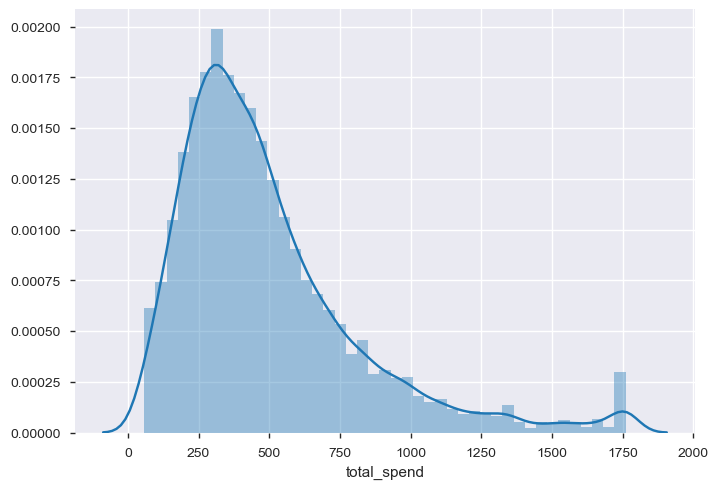

In [47]:
#Plot to check the distribution of dependent variable.
sns.distplot(credit_card_new.total_spend)
plt.show()

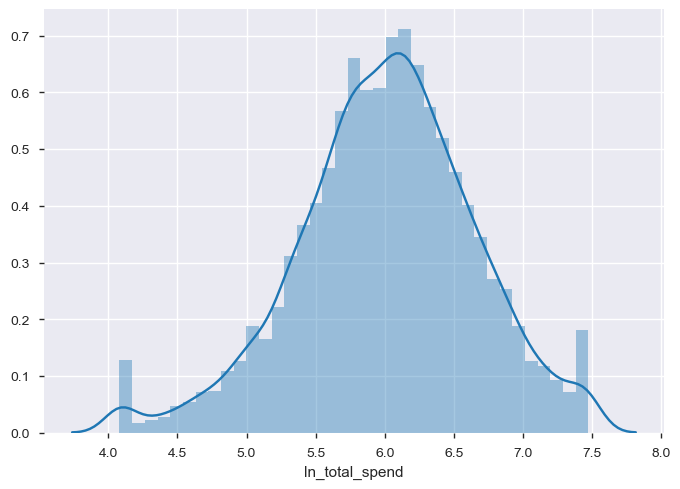

In [48]:
#Plot after taking logarithmic conversion of dependent variables for validating assumption of Linear Regression.
credit_card_new['ln_total_spend']=np.log(credit_card_new['total_spend']+1)
sns.distplot(credit_card_new.ln_total_spend)
plt.show()

### Correlation matrix to check the univariate and bi-variate analysis of variables

In [49]:
# correlation matrix
corrm = credit_card_new.corr()
#corrm.to_csv('corrm.csv')
corrm

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend
townsize,1.000000,-0.075454,-0.069069,0.002901,0.003684,-0.059279,-0.058155,-0.009513,0.000895,-0.007590,...,0.022748,0.002663,0.005330,0.007894,-0.000636,-0.028673,-0.006225,-0.010036,-0.007200,0.006104
age,-0.075454,1.000000,0.969879,-0.093966,-0.081129,0.705515,0.739573,0.208286,0.142984,0.209659,...,-0.074423,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231,0.007393
agecat,-0.069069,0.969879,1.000000,-0.078331,-0.064124,0.679902,0.732246,0.234081,0.190188,0.249394,...,-0.059490,-0.123192,-0.208690,-0.223387,-0.029310,0.348275,0.010039,0.010467,-0.014860,0.030306
ed,0.002901,-0.093966,-0.078331,1.000000,0.966489,-0.214669,-0.197841,0.186802,0.206332,0.196343,...,0.300016,0.435623,0.369831,0.377019,0.276163,-0.073510,-0.117333,0.073750,0.107912,0.098110
edcat,0.003684,-0.081129,-0.064124,0.966489,1.000000,-0.199709,-0.185672,0.187173,0.207209,0.197250,...,0.293125,0.414619,0.357481,0.361191,0.273646,-0.068420,-0.112653,0.070172,0.106223,0.094751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
news_1,-0.028673,0.365204,0.348275,-0.073510,-0.068420,0.368778,0.369206,0.138730,0.108047,0.134251,...,-0.037949,-0.061753,-0.099716,-0.089811,-0.024573,1.000000,0.020919,0.030136,-0.011148,0.029929
response_01_1,-0.006225,0.015140,0.010039,-0.117333,-0.112653,0.039085,0.030418,-0.002440,-0.001206,-0.001148,...,-0.023472,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.009181
response_02_1,-0.010036,0.013175,0.010467,0.073750,0.070172,0.014410,0.017504,0.062895,0.061287,0.062603,...,0.021608,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.026863
response_03_1,-0.007200,-0.026231,-0.014860,0.107912,0.106223,-0.029312,-0.032850,0.053011,0.060666,0.055488,...,0.077116,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.061558


In [50]:
#Exporting output to an excel file
#corrm.to_excel(writer , sheet_name = 'correlation matrix')
#writer.save()

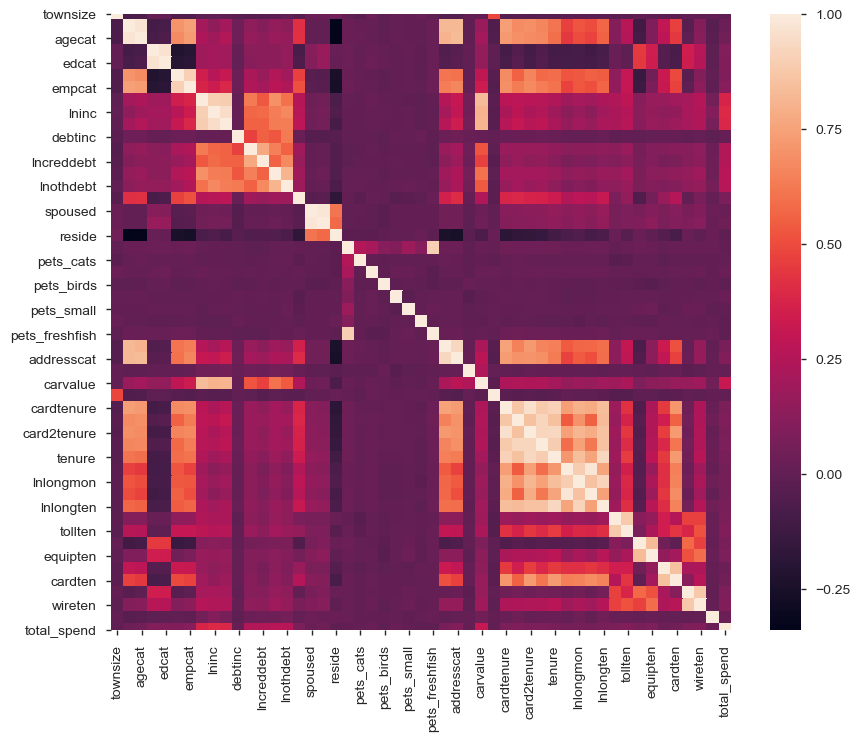

In [51]:
# heatmap showing correlation
plt.figure(figsize = (10, 8))
sns.heatmap(credit_card_num.corr())

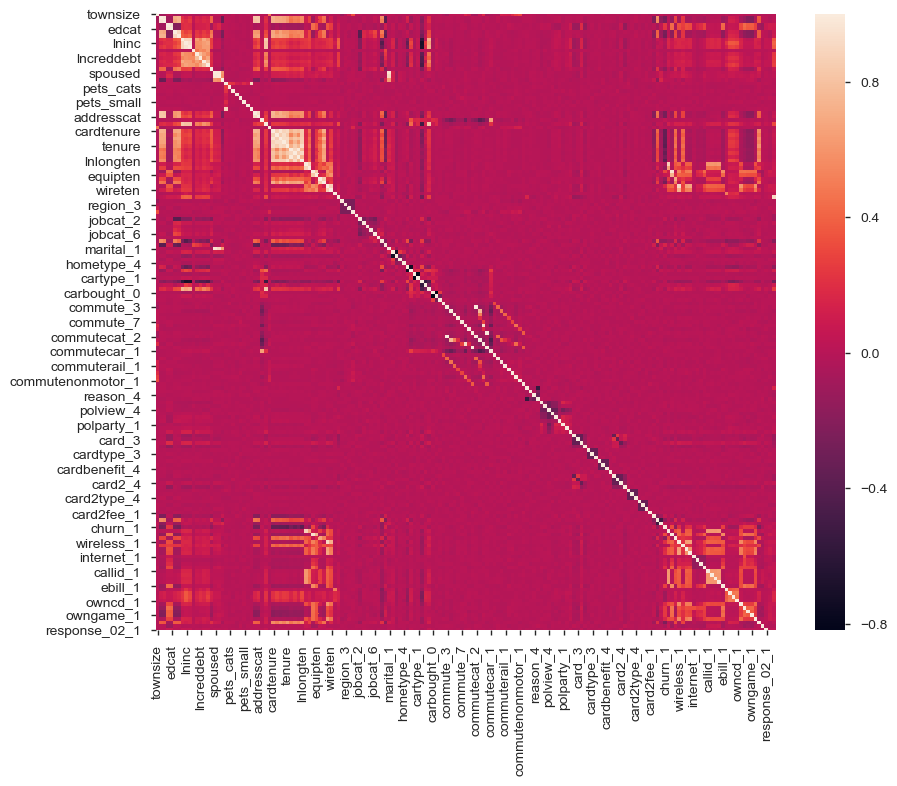

In [52]:
# heatmap showing correlation
plt.figure(figsize = (10, 8))
sns.heatmap(credit_card_new.corr())

### It is very difficult to derive any conclusion from above correlation matrix. So, we won't drop any variables.

### Model Building

In [53]:
#Splitting the data
feature_columns = credit_card_new.columns.difference( ['ln_total_spend', 'total_spend'] )
feature_columns

Index(['active_1', 'address', 'addresscat', 'age', 'agecat', 'bfast_2',
       'bfast_3', 'callcard_1', 'callid_1', 'callwait_1',
       ...
       'tollfree_1', 'tollmon', 'tollten', 'townsize', 'union_1', 'voice_1',
       'vote_1', 'wireless_1', 'wiremon', 'wireten'],
      dtype='object', length=169)

In [54]:
#This will be used in sklearn related functions
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_card_new[feature_columns],
                                                  credit_card_new['ln_total_spend'],
                                                  test_size = 0.3,
                                                   random_state=567890)

In [55]:
print(len( train_X ))
print(len( test_X))

3500
1500


In [56]:
#from sklearn.cross_validation import train_test_split

train, test = train_test_split( credit_card_new,test_size = 0.3,random_state = 1234 )

In [57]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['townsize', 'age', 'agecat', 'ed', 'edcat', 'employ', 'empcat',
       'income', 'lninc', 'inccat',
       ...
       'ownpda_1', 'ownpc_1', 'ownipod_1', 'owngame_1', 'ownfax_1', 'news_1',
       'response_01_1', 'response_02_1', 'response_03_1', 'ln_total_spend'],
      dtype='object', length=171)

In [58]:
#Getting all columns in form of a formula to be used in statistical model building.
all_columns = "+".join(train.columns.difference( ['ln_total_spend'] ))

print(all_columns)

active_1+address+addresscat+age+agecat+bfast_2+bfast_3+callcard_1+callid_1+callwait_1+carbought_0+carbought_1+carbuy_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_2+card2benefit_3+card2benefit_4+card2fee_1+card2tenure+card2tenurecat+card2type_2+card2type_3+card2type_4+card_2+card_3+card_4+card_5+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee_1+cardmon+cardten+cardtenure+cardtenurecat+cardtype_2+cardtype_3+cardtype_4+carown_0+carown_1+cars+cartype_0+cartype_1+carvalue+churn_1+commute_10+commute_2+commute_3+commute_4+commute_5+commute_6+commute_7+commute_8+commute_9+commutebike_1+commutebus_1+commutecar_1+commutecarpool_1+commutecat_2+commutecat_3+commutecat_4+commutecat_5+commutemotorcycle_1+commutenonmotor_1+commutepublic_1+commuterail_1+commutetime+commutewalk_1+confer_1+creddebt+debtinc+default_1+ebill_1+ed+edcat+empcat+employ+equip_1+equipmon+equipten+forward_1+gender_1+homeown_1+hometype_2+hometype_3+hometype_4+hourstv+inccat+income+int

### F-Regression for Feature Selection

In [59]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
features = train_X
target = train_y
F_values, p_values  = f_regression(features, target )

In [60]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results

,Variable,F_Value,P_Value
0,active_1,0.917668,0.338
1,address,10.487644,0.001
2,addresscat,23.638779,0.000
3,age,1.121291,0.290
4,agecat,6.609777,0.010
...,...,...,...
164,voice_1,4.252712,0.039
165,vote_1,9.388755,0.002
166,wireless_1,19.445395,0.000
167,wiremon,26.145756,0.000


In [61]:
#Sorting values based on p-values.
f_reg_results.sort_values(by=['P_Value'])

f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [62]:
#Filtering only those variables with p-value<=0.1
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.1]

f_reg_results_new

,Variable,F_Value,P_Value
1,address,10.487644,0.001000
2,addresscat,23.638779,0.000000
4,agecat,6.609777,0.010000
5,bfast_2,3.813575,0.051000
6,bfast_3,7.048326,0.008000
...,...,...,...
164,voice_1,4.252712,0.039000
165,vote_1,9.388755,0.002000
166,wireless_1,19.445395,0.000000
167,wiremon,26.145756,0.000000


In [63]:
#Creating formula for model based on selected variables after f-regression.
mask = f_reg_results_new.Variable.to_list()

In [64]:
all_columns = "+".join(mask)

print(all_columns)

address+addresscat+agecat+bfast_2+bfast_3+callid_1+callwait_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card2benefit_4+card2tenure+card2tenurecat+card_2+card_3+card_4+card_5+cardten+cardtenure+cardtenurecat+carown_0+carown_1+carvalue+churn_1+commute_4+commutecat_3+confer_1+creddebt+ebill_1+ed+edcat+empcat+employ+equip_1+equipmon+equipten+forward_1+gender_1+homeown_1+hometype_2+hourstv+inccat+income+internet_3+internet_4+jobcat_2+jobcat_3+jobsat+lncreddebt+lninc+lnlongmon+lnlongten+lnothdebt+multline_1+othdebt+owncd_1+owndvd_1+ownfax_1+owngame_1+ownpc_1+ownpda_1+owntv_1+ownvcr_1+pager_1+pets_birds+polcontrib_1+reason_2+reason_4+region_5+response_02_1+response_03_1+retire_1+spousedcat+tenure+tollfree_1+tollmon+tollten+union_1+voice_1+vote_1+wireless_1+wiremon+wireten


In [65]:
#Final formula to be used in model.
my_formula = "ln_total_spend~" + all_columns

print(my_formula)

ln_total_spend~address+addresscat+agecat+bfast_2+bfast_3+callid_1+callwait_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card2benefit_4+card2tenure+card2tenurecat+card_2+card_3+card_4+card_5+cardten+cardtenure+cardtenurecat+carown_0+carown_1+carvalue+churn_1+commute_4+commutecat_3+confer_1+creddebt+ebill_1+ed+edcat+empcat+employ+equip_1+equipmon+equipten+forward_1+gender_1+homeown_1+hometype_2+hourstv+inccat+income+internet_3+internet_4+jobcat_2+jobcat_3+jobsat+lncreddebt+lninc+lnlongmon+lnlongten+lnothdebt+multline_1+othdebt+owncd_1+owndvd_1+ownfax_1+owngame_1+ownpc_1+ownpda_1+owntv_1+ownvcr_1+pager_1+pets_birds+polcontrib_1+reason_2+reason_4+region_5+response_02_1+response_03_1+retire_1+spousedcat+tenure+tollfree_1+tollmon+tollten+union_1+voice_1+vote_1+wireless_1+wiremon+wireten


In [66]:
import statsmodels.formula.api as smf   #Simultaneously reducing variables further based on p-values in model.
lm = smf.ols('ln_total_spend~addresscat+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+edcat+gender_1+hourstv+internet_3+internet_4+lninc+reason_2+reason_4+region_5+response_02_1+response_03_1+tollten+union_1+voice_1+vote_1', data = train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     76.30
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          6.19e-307
Time:                        11:07:28   Log-Likelihood:                -2680.1
No. Observations:                3500   AIC:                             5412.
Df Residuals:                    3474   BIC:                             5572.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6268      0.070     80.

### VIF(Variance Inflation Factor): Check the multicollinearity for all the variables in the model.

In [67]:
model_param='ln_total_spend~addresscat+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+edcat+gender_1+hourstv+internet_3+internet_4+lninc+reason_2+reason_4+region_5+response_02_1+response_03_1+tollten+union_1+voice_1+vote_1'
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices(model_param, train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,62.300000
1,addresscat,1.200000
2,card2_2,2.100000
3,card2_3,2.100000
4,card2_4,2.300000
5,card2_5,1.400000
6,card2benefit_3,1.000000
7,card_2,2.000000
8,card_3,2.000000
9,card_4,2.200000


In [68]:
#Predict the sales on the training data
train['pred_limit'] = np.exp(lm.predict(train))
train.head()

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend,pred_limit
4735,5.000000,58,5,13,2,20,5,113.000000,4.727388,4,...,1,0,0,0,1,0,0,0,7.010375,446.492611
1796,4.000000,68,6,12,2,26,5,89.000000,4.488636,4,...,1,1,0,1,1,0,0,0,5.857962,498.934733
479,5.000000,37,4,21,5,2,2,147.000000,4.990433,5,...,1,1,1,1,0,0,0,0,5.768696,486.834116
2524,1.000000,29,3,21,5,0,1,32.000000,3.465736,2,...,1,1,1,0,0,0,0,0,6.007781,550.655131
1565,4.000000,35,4,14,2,5,2,34.000000,3.526361,2,...,0,0,0,0,0,0,0,0,5.008232,490.878547


In [69]:
#Predict the sales on the testing/validation data
test['pred_limit'] = np.exp(lm.predict(test))
test.head()

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend,pred_limit
2706,2.000000,23,2,13,2,1,1,53.000000,3.970292,3,...,0,0,1,0,0,0,1,0,6.236467,341.696013
2436,1.000000,66,6,17,4,26,5,31.000000,3.433987,2,...,1,1,1,0,0,0,0,0,5.850678,298.745335
1201,5.000000,71,6,13,2,27,5,12.000000,2.484907,1,...,1,0,0,0,1,0,0,0,5.401235,188.375409
1486,1.000000,61,5,19,4,3,2,22.000000,3.091042,1,...,1,1,1,0,0,0,0,0,6.979899,512.666213
4286,2.000000,55,5,16,3,24,5,272.010000,5.605839,5,...,1,1,0,1,1,0,0,0,6.618646,654.707392


### Decile Analysis based on variables obtained from statisctical model

In [70]:
# accuracy metrics (Decile Analysis: for validation of models - Business validation)
# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_limit'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_limit'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_limit']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_limit']
Actual_avg = train[['Deciles', 'ln_total_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()


C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [71]:
# Decile Analysis for test data
Predicted_avg = test[['Deciles', 'pred_limit']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_limit']
Actual_avg = test[['Deciles', 'ln_total_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
#Decile_analysis_train.to_csv('Decile_analysis_train.csv')
#Decile_analysis_test.to_csv('Decile_analysis_test.csv')

In [72]:
Decile_analysis_train

,Deciles,pred_limit,ln_total_spend
0,9,856.171923,6.729468
1,8,626.773909,6.437839
2,7,530.589940,6.253534
3,6,464.898953,6.171278
4,5,413.754501,6.054765
5,4,371.180478,5.899665
6,3,335.329348,5.816999
7,2,305.256448,5.718680
8,1,274.996350,5.634631
9,0,226.602326,5.385277


In [73]:
Decile_analysis_test

,Deciles,pred_limit,ln_total_spend
0,9,821.509079,6.670899
1,8,613.770627,6.427318
2,7,523.383890,6.235313
3,6,465.343537,6.105920
4,5,413.158363,5.974307
5,4,368.520593,5.934333
6,3,336.430299,5.819846
7,2,309.715617,5.768957
8,1,280.495026,5.704572
9,0,232.379163,5.380356


### Checking for influential observation

In [74]:
from statsmodels.formula.api import ols
model = ols('ln_total_spend~addresscat+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+edcat+gender_1+hourstv+internet_3+internet_4+lninc+reason_2+reason_4+region_5+response_02_1+response_03_1+tollten+union_1+voice_1+vote_1',train).fit()
infl=model.get_influence()
summary_frame=infl.summary_frame()

summary_frame

,dfb_Intercept,dfb_addresscat,dfb_card2_2,dfb_card2_3,dfb_card2_4,dfb_card2_5,dfb_card2benefit_3,dfb_card_2,dfb_card_3,dfb_card_4,...,dfb_tollten,dfb_union_1,dfb_voice_1,dfb_vote_1,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
4735,-0.018624,-0.009509,0.044552,0.003505,0.019020,0.009621,-0.014148,0.009397,-0.008906,0.037608,...,0.037635,-0.013939,-0.028320,0.026357,0.000500,1.743940,0.004255,0.114002,1.744453,0.114035
1796,0.004703,-0.005480,-0.011478,-0.002515,0.002816,0.001122,0.006507,-0.002804,-0.014710,0.003037,...,-0.033580,0.004767,-0.006767,0.013717,0.000188,-0.682278,0.010372,-0.069847,-0.682225,-0.069842
479,0.025229,-0.008100,-0.001223,-0.008331,-0.019972,-0.003811,0.009173,-0.006548,-0.026935,-0.006889,...,0.014126,0.007975,-0.010234,-0.009476,0.000203,-0.805877,0.008047,-0.072584,-0.805836,-0.072580
2524,-0.001307,0.006871,-0.011171,0.002826,0.005934,-0.000713,-0.016001,0.009831,0.017081,0.018242,...,-0.003630,0.004121,0.017042,-0.007924,0.000105,-0.583062,0.007971,-0.052263,-0.583007,-0.052258
1565,-0.044545,0.006138,0.087443,0.062094,0.078700,0.063104,0.025007,0.018935,-0.038475,0.027459,...,0.018373,0.011467,0.006403,0.038568,0.000833,-2.279140,0.004150,-0.147128,-2.280517,-0.147217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.003993,-0.010126,-0.000821,0.002325,0.007326,-0.000772,0.008817,0.000529,0.008239,0.003495,...,-0.000400,-0.002212,-0.003090,-0.005210,0.000023,0.294629,0.006714,0.024222,0.294591,0.024219
3276,-0.005974,0.007555,-0.003393,0.009205,0.003586,-0.066842,-0.041240,-0.013792,0.017514,0.001386,...,-0.010238,-0.055952,0.012337,0.022703,0.000598,-1.359575,0.008335,-0.124645,-1.359741,-0.124660
1318,0.005921,-0.000816,-0.001087,-0.000720,0.006049,0.000992,-0.003490,-0.008247,-0.008146,-0.006478,...,-0.001327,-0.003107,-0.004353,0.005626,0.000020,0.367287,0.003858,0.022858,0.367241,0.022855
723,0.004988,-0.007658,-0.001883,0.004704,0.001026,-0.033441,0.006381,-0.006627,0.009823,0.001183,...,0.003433,0.003920,0.001088,0.009607,0.000113,-0.684926,0.006212,-0.054150,-0.684873,-0.054146


In [75]:
#Exporting output to an excel file
#summary_frame.to_excel(writer , sheet_name = 'influential obs summary')
#writer.save()

### Variable Reduction Using RFE

In [76]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = credit_card_new
Y = credit_card_new['ln_total_spend']
logreg = LinearRegression()
rfe = RFE(logreg, n_features_to_select=45)
rfe = rfe.fit(X, Y)
print("Features sorted by their rank: ")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), credit_card_new.columns)))

Features sorted by their rank: 
[(1, 'callcard_1'), (1, 'carbought_0'), (1, 'carbought_1'), (1, 'carcatvalue_1'), (1, 'carcatvalue_2'), (1, 'carcatvalue_3'), (1, 'card2_2'), (1, 'card2_4'), (1, 'card2_5'), (1, 'card_2'), (1, 'card_3'), (1, 'carown_0'), (1, 'carown_1'), (1, 'cartype_0'), (1, 'cartype_1'), (1, 'commute_10'), (1, 'commute_2'), (1, 'commute_3'), (1, 'commute_4'), (1, 'commute_5'), (1, 'commute_6'), (1, 'commute_7'), (1, 'commute_8'), (1, 'commute_9'), (1, 'commutecat_2'), (1, 'commutecat_3'), (1, 'commutecat_4'), (1, 'commutecat_5'), (1, 'empcat'), (1, 'employ'), (1, 'equip_1'), (1, 'hometype_3'), (1, 'inccat'), (1, 'jobcat_5'), (1, 'ln_total_spend'), (1, 'lninc'), (1, 'marital_1'), (1, 'multline_1'), (1, 'owngame_1'), (1, 'ownipod_1'), (1, 'pets_dogs'), (1, 'polparty_1'), (1, 'reason_2'), (1, 'tollfree_1'), (1, 'voice_1'), (2, 'reason_4'), (3, 'pets_cats'), (4, 'response_01_1'), (5, 'owncd_1'), (6, 'card_5'), (7, 'vote_1'), (8, 'card2type_3'), (9, 'cardbenefit_4'), (10, '

In [77]:
RFE_features = credit_card_new.columns[rfe.get_support()]
RFE_features

Index(['employ', 'empcat', 'lninc', 'inccat', 'pets_dogs', 'jobcat_5',
       'marital_1', 'hometype_3', 'carown_0', 'carown_1', 'cartype_0',
       'cartype_1', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3',
       'carbought_0', 'carbought_1', 'commute_2', 'commute_3', 'commute_4',
       'commute_5', 'commute_6', 'commute_7', 'commute_8', 'commute_9',
       'commute_10', 'commutecat_2', 'commutecat_3', 'commutecat_4',
       'commutecat_5', 'reason_2', 'polparty_1', 'card_2', 'card_3', 'card2_2',
       'card2_4', 'card2_5', 'tollfree_1', 'equip_1', 'callcard_1',
       'multline_1', 'voice_1', 'ownipod_1', 'owngame_1', 'ln_total_spend'],
      dtype='object')

### K-Best

In [78]:
from sklearn.feature_selection import SelectKBest, f_regression

In [79]:
X = credit_card_new
X_new = SelectKBest(f_regression, k=30).fit(X, credit_card_new['ln_total_spend'])
KBest_features = X.columns[X_new.get_support()]

KBest_features

Index(['ed', 'edcat', 'empcat', 'income', 'lninc', 'inccat', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'carvalue', 'tollten', 'equipten',
       'wiremon', 'wireten', 'total_spend', 'retire_1', 'carown_0', 'carown_1',
       'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'reason_2', 'card_2',
       'card_3', 'card2_3', 'owntv_1', 'ownvcr_1', 'owndvd_1', 'owncd_1'],
      dtype='object')

In [80]:
merge_list = [y for x in [RFE_features, KBest_features] for y in x]

important_features = [i for i in merge_list if i in vif[vif['VIF Factor']<=4.0]['Features'].values]
print(important_features)

['lninc', 'reason_2', 'card_2', 'card_3', 'card2_2', 'card2_4', 'card2_5', 'voice_1', 'edcat', 'lninc', 'tollten', 'reason_2', 'card_2', 'card_3', 'card2_3']


### Reduced variables after applying Linear Regression

In [81]:
features=['addresscat','carbought_1',
'card2_2','card2_3','card2_4','card2_5','card2benefit_3',
'card_2','card_3','card_4','card_5','cardmon',
'cardtype_2',
'cartype_0','carvalue',
'debtinc','default_1','ebill_1','edcat','empcat','gender_1',
'hometype_3','internet_3',
'jobcat_5','jobsat','lncreddebt','lninc',
'othdebt','pets',
'pets_reptiles','pets_saltfish',
'reason_2','reason_9','retire_1',
'tenure','union_1','ln_total_spend']

In [82]:
credit_card_reduced=credit_card_new[features]

### Applying Cook's D for predicting influential variables

In [83]:
credit_card_reduced['cooks']=summary_frame['cooks_d']

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
train_test_new=credit_card_reduced[credit_card_reduced['cooks'] < 4/credit_card_reduced.shape[0]]

In [85]:
credit_card_new=credit_card_new[features]
credit_card_new.head()

,addresscat,carbought_1,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card_2,card_3,card_4,...,othdebt,pets,pets_reptiles,pets_saltfish,reason_2,reason_9,retire_1,tenure,union_1,ln_total_spend
0,1,0,0,0,0,1,0,0,1,0,...,2.240091,0,0,0,0,1,0,5,1,5.013697
1,1,0,0,0,1,0,1,1,0,0,...,1.567980,6,0,0,0,1,0,39,0,4.363608
2,5,0,0,0,1,0,1,1,0,0,...,2.536380,3,0,0,1,0,0,65,0,5.888795
3,2,0,0,1,0,0,0,1,0,0,...,1.117200,0,0,0,0,1,0,36,0,5.887242
4,2,0,0,0,0,0,0,0,0,1,...,0.176341,0,0,0,0,1,0,21,0,6.232114


In [86]:
# divide the data into training and testing and separate out Y and X variables 
train,test=train_test_split(train_test_new,test_size=0.3,random_state=56789)

In [87]:
new_features=credit_card_new.columns.difference(['addresscat','hometype_3','commutenonmotor'])

### New Model after removing influential variables

In [88]:
model2='ln_total_spend ~ ' + ' + '.join(new_features)
print(model2)

ln_total_spend ~ carbought_1 + card2_2 + card2_3 + card2_4 + card2_5 + card2benefit_3 + card_2 + card_3 + card_4 + card_5 + cardmon + cardtype_2 + cartype_0 + carvalue + debtinc + default_1 + ebill_1 + edcat + empcat + gender_1 + internet_3 + jobcat_5 + jobsat + ln_total_spend + lncreddebt + lninc + othdebt + pets + pets_reptiles + pets_saltfish + reason_2 + reason_9 + retire_1 + tenure + union_1


In [89]:
#Further reduction of variables based on p-values in OLS Model.

In [90]:
lm2=smf.ols('''ln_total_spend ~  card2_2 + card2_3 + card2_4 + card2_5 + card2benefit_3 + card_2 + card_3 +
card_4 + card_5 
+ lninc + reason_2 + reason_9 +
retire_1 + union_1''',train).fit()

In [91]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          1.26e-245
Time:                        11:07:48   Log-Likelihood:                -1240.9
No. Observations:                2240   AIC:                             2512.
Df Residuals:                    2225   BIC:                             2597.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.5947      0.069     80.

In [92]:
#Predict the sales on the training data using model2
train['pred_limit'] = np.exp(lm2.predict(train))
train.head()

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,addresscat,carbought_1,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card_2,card_3,card_4,...,pets_reptiles,pets_saltfish,reason_2,reason_9,retire_1,tenure,union_1,ln_total_spend,cooks,pred_limit
1851,4,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,68,0,7.265171,0.000610,656.225701
1890,5,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,72,0,5.602598,0.000069,385.866256
3524,3,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,41,0,6.251345,0.000002,501.379612
4388,5,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,52,1,5.540243,0.000025,251.976283
4462,5,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,72,0,5.906097,0.000282,531.770972


In [93]:
#Predict the sales on the testing/validation data using model2
test['pred_limit'] = np.exp(lm2.predict(test))
test.head()

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,addresscat,carbought_1,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card_2,card_3,card_4,...,pets_reptiles,pets_saltfish,reason_2,reason_9,retire_1,tenure,union_1,ln_total_spend,cooks,pred_limit
2091,5,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,37,0,6.119836,0.000041,635.196541
884,3,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,15,0,6.492906,0.000372,358.884673
965,2,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,7,0,5.987682,0.000035,568.231090
2755,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,47,0,5.926793,0.000039,416.701091
2545,4,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,56,0,6.938304,0.000562,582.618177


In [94]:
train['actual_limit'] = np.exp(train.ln_total_spend)
test['actual_limit'] = np.exp(test.ln_total_spend)

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
train.head()

,addresscat,carbought_1,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card_2,card_3,card_4,...,pets_saltfish,reason_2,reason_9,retire_1,tenure,union_1,ln_total_spend,cooks,pred_limit,actual_limit
1851,4,0,0,0,0,0,0,0,0,1,...,0,0,1,0,68,0,7.265171,0.000610,656.225701,1429.630000
1890,5,0,0,0,0,0,0,1,0,0,...,0,0,1,1,72,0,5.602598,0.000069,385.866256,271.130000
3524,3,0,1,0,0,0,0,0,0,1,...,0,0,1,0,41,0,6.251345,0.000002,501.379612,518.710000
4388,5,0,0,1,0,0,1,1,0,0,...,0,0,1,1,52,1,5.540243,0.000025,251.976283,254.740000
4462,5,0,0,0,0,1,0,0,1,0,...,0,0,1,1,72,0,5.906097,0.000282,531.770972,367.270000


In [96]:
test.head()

,addresscat,carbought_1,card2_2,card2_3,card2_4,card2_5,card2benefit_3,card_2,card_3,card_4,...,pets_saltfish,reason_2,reason_9,retire_1,tenure,union_1,ln_total_spend,cooks,pred_limit,actual_limit
2091,5,0,0,0,0,0,0,1,0,0,...,0,0,1,0,37,0,6.119836,0.000041,635.196541,454.790000
884,3,0,0,1,0,0,1,0,0,1,...,0,0,1,0,15,0,6.492906,0.000372,358.884673,660.440000
965,2,0,0,1,0,0,0,0,0,0,...,0,0,1,0,7,0,5.987682,0.000035,568.231090,398.490000
2755,2,0,0,0,0,0,0,0,1,0,...,0,1,0,1,47,0,5.926793,0.000039,416.701091,374.950000
2545,4,1,0,0,0,0,0,1,0,0,...,0,0,1,0,56,0,6.938304,0.000562,582.618177,1031.020000


### Calculation of MAPE, RMSE and Correlation for training and testing data

In [97]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [98]:
#Train Data
MAPE_train = np.mean(np.abs(train.actual_limit - train.pred_limit)/train.actual_limit )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.actual_limit , train.pred_limit)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.actual_limit , train.pred_limit)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.actual_limit - test.pred_limit)/test.actual_limit )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.actual_limit , test.pred_limit)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.actual_limit , test.pred_limit)
print(Corr_test)

0.3667919247008307
49621.09330168316
(0.6571378514401838, 4.678787966589993e-277)
0.3694475478801806
55406.80962153476
(0.6610642933965682, 1.2067673007280733e-121)


### Decile Analysis for checking the performance of Model2

In [99]:
# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_limit'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_limit'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_limit']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_limit']
Actual_avg = train[['Deciles', 'ln_total_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
# Decile Analysis for test data
Predicted_avg = test[['Deciles', 'pred_limit']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_limit']
Actual_avg = test[['Deciles', 'ln_total_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

#Decile_analysis_train.to_excel(writer, sheet_name = 'Decile_Analysis_train')
#Decile_analysis_test.to_excel(writer, sheet_name = 'Decile_Analysis_test')
#writer.save()

In [101]:
Decile_analysis_train

,Deciles,pred_limit,ln_total_spend
0,9,832.504533,6.736466
1,8,625.741822,6.435122
2,7,537.987789,6.259858
3,6,476.912407,6.172277
4,5,426.460407,6.031495
5,4,383.949841,5.975002
6,3,352.182562,5.817850
7,2,322.495862,5.810479
8,1,291.879104,5.677113
9,0,247.782870,5.518554


In [102]:
Decile_analysis_test

,Deciles,pred_limit,ln_total_spend
0,9,797.329583,6.802156
1,8,614.581493,6.399669
2,7,534.125052,6.283415
3,6,470.937924,6.128118
4,5,422.714775,6.019312
5,4,387.292068,5.977022
6,3,351.754298,5.833724
7,2,324.002817,5.770787
8,1,295.271896,5.723130
9,0,250.006920,5.585635


### Assumptions Check

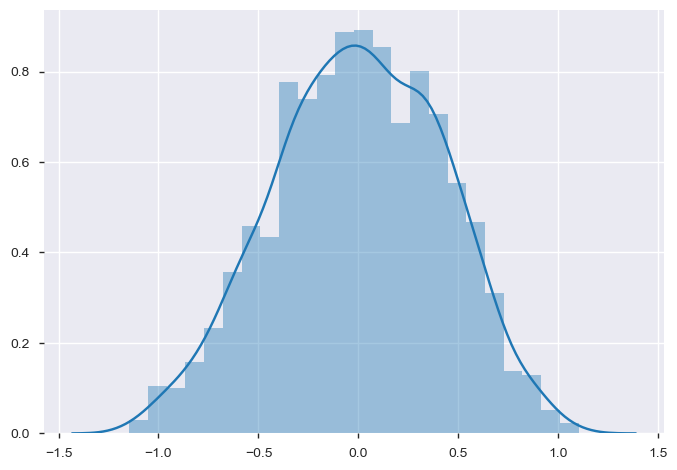

In [103]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lm2.resid)
plt.show()

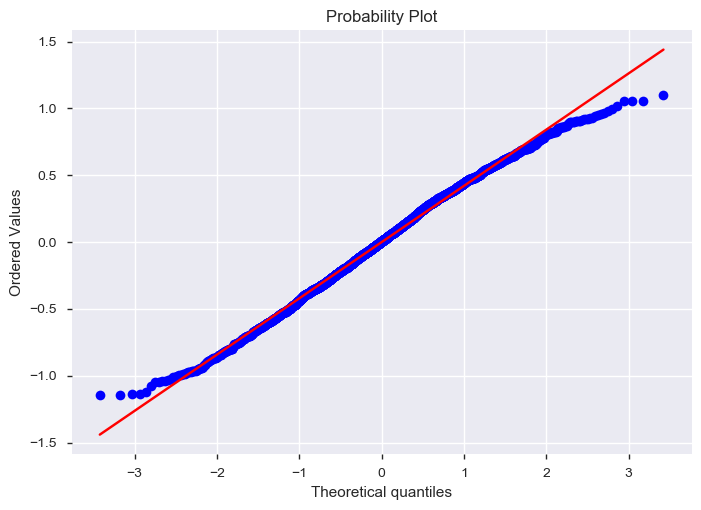

In [104]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats
import pylab

stats.probplot(lm2.resid, dist = 'norm', plot = pylab)
pylab.show()

In [105]:
# assumption: mean of residuals/errors is zero
print(lm2.resid.mean())

-5.109801470837283e-15


In [106]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(lm2.resid, train.ln_total_spend))

(0.7656498741711989, 0.0)


In [107]:
lm2.resid.shape

(2240,)

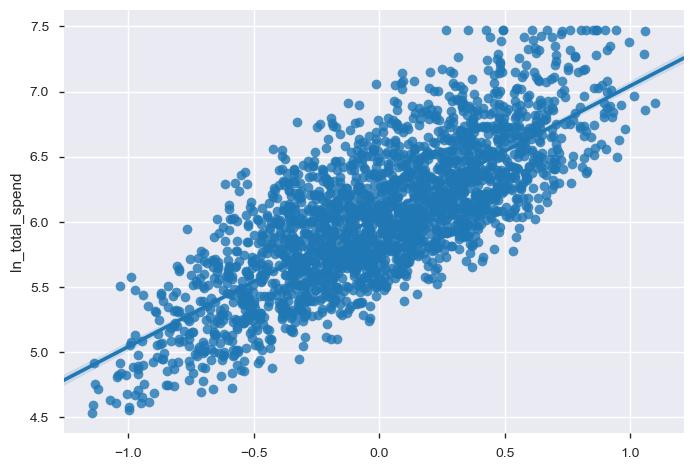

In [108]:
import seaborn as sns
sns.regplot(x=lm2.resid, y=train.ln_total_spend)
#sns.jointplot(x=train.pred_limit, y=train.ln_total_spend)
#sns.scatterplot(x=train.pred_limit, y=train.ln_total_spend)
plt.show()

### Machine Learning Approach

### 1. Random Forest Model

In [109]:
#Method 2: Required for machine learning methods available in Sklearn
train_X, test_X, train_y, test_y = train_test_split(train_test_new[credit_card_new.columns.difference(['ln_total_spend'])], 
                                            train_test_new['ln_total_spend'], test_size = 0.3, random_state = 12345)

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor(n_estimators=100)
rf_regressor.fit(train_X, train_y)
y_pred_rf= rf_regressor.predict(test_X)
acc_rf = round( rf_regressor.score(test_X,test_y) * 100, 2)
print (str(acc_rf) + ' percent')

27.36 percent


In [111]:
train_X.columns

Index(['addresscat', 'carbought_1', 'card2_2', 'card2_3', 'card2_4', 'card2_5',
       'card2benefit_3', 'card_2', 'card_3', 'card_4', 'card_5', 'cardmon',
       'cardtype_2', 'cartype_0', 'carvalue', 'debtinc', 'default_1',
       'ebill_1', 'edcat', 'empcat', 'gender_1', 'hometype_3', 'internet_3',
       'jobcat_5', 'jobsat', 'lncreddebt', 'lninc', 'othdebt', 'pets',
       'pets_reptiles', 'pets_saltfish', 'reason_2', 'reason_9', 'retire_1',
       'tenure', 'union_1'],
      dtype='object')

### Feature Importance

In [112]:
rf_regressor.feature_importances_
list(zip(train_X.columns,rf_regressor.feature_importances_ ))

[('addresscat', 0.02013836069321691),
 ('carbought_1', 0.007767146623400635),
 ('card2_2', 0.01205388892971978),
 ('card2_3', 0.010939332004904474),
 ('card2_4', 0.0076325445060576825),
 ('card2_5', 0.002938812512432621),
 ('card2benefit_3', 0.008583353833523617),
 ('card_2', 0.03467701401760647),
 ('card_3', 0.027274618351781573),
 ('card_4', 0.027508473100608274),
 ('card_5', 0.009615768733822506),
 ('cardmon', 0.05075421063025968),
 ('cardtype_2', 0.008839250538306394),
 ('cartype_0', 0.008993116089033725),
 ('carvalue', 0.06671412635239606),
 ('debtinc', 0.0560374592790113),
 ('default_1', 0.005510573522542894),
 ('ebill_1', 0.007032226037307306),
 ('edcat', 0.022788285909075213),
 ('empcat', 0.01908023262341021),
 ('gender_1', 0.012110212373828555),
 ('hometype_3', 0.007350705542619297),
 ('internet_3', 0.005007434162316944),
 ('jobcat_5', 0.004235539413022465),
 ('jobsat', 0.022875740540771093),
 ('lncreddebt', 0.06562825475097901),
 ('lninc', 0.28221047630820245),
 ('othdebt', 0

In [113]:
# Using Random Forest
coeff=pd.DataFrame(rf_regressor.feature_importances_, train_X.columns)
coeff.columns=['Coefficients']
coeff.sort_values('Coefficients',ascending=False,inplace=True)
coeff['Coefficients']=((coeff['Coefficients'])*100).round(2)
coeff=coeff.head(10)

In [114]:
#coeff.to_excel(writer, sheet_name='key drivers')
#writer.save()

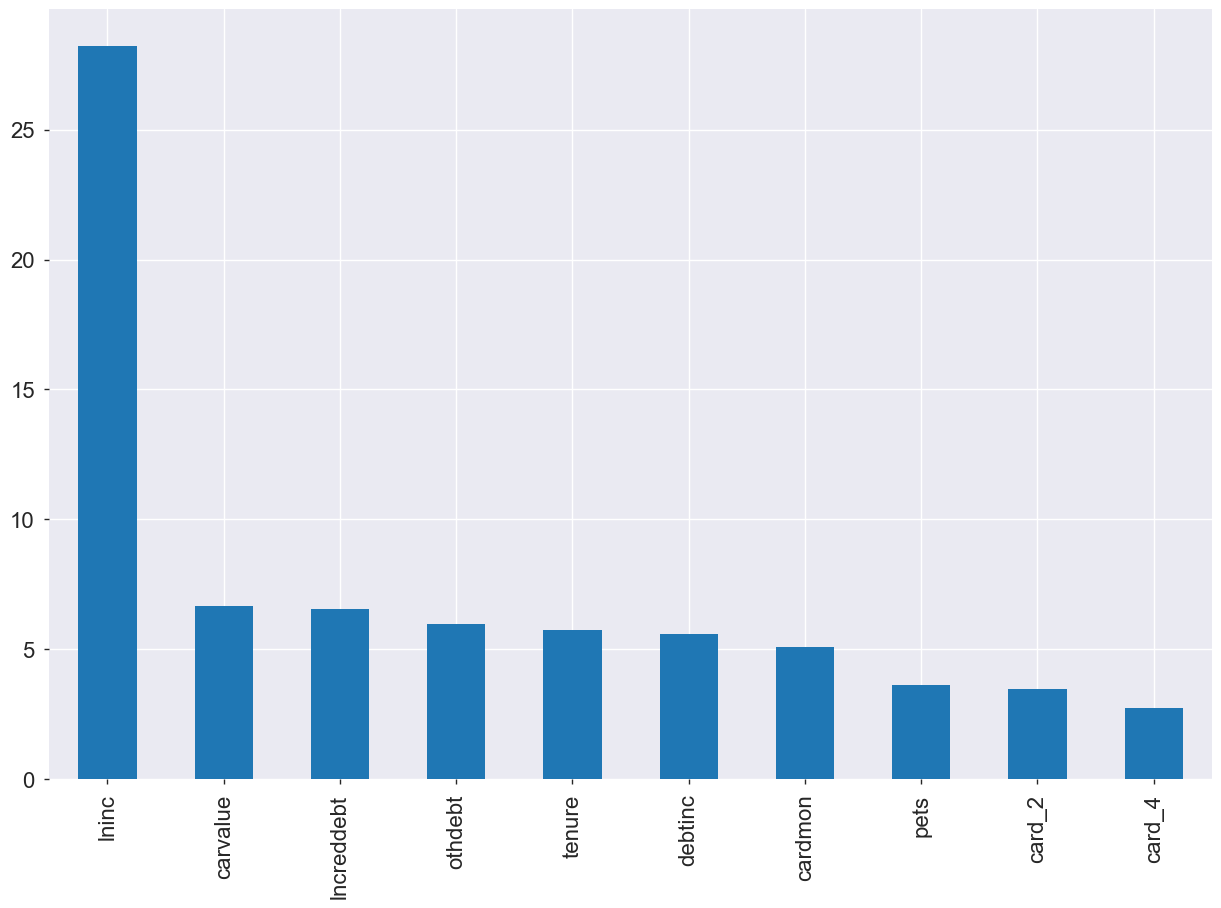

In [115]:
coeff_values=coeff.head(12)
coeff.Coefficients.plot(kind='bar',figsize=(15,10),fontsize=16)
plt.show()
#plt.savefig('coef.png', bbox_inches='tight')

### 2. Linear Regression Model:

In [116]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
linreg.score(train_X, train_y)

0.4310569342285557

In [118]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([6.25671557, 5.66634644, 5.65337315, ..., 6.1137786 , 5.36763675,
       5.53150759])

In [119]:
# Calculation of r2 value for training dataset.
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
print(metrics.r2_score( train_y, y_pred_t ))

0.41612103951083224
0.43105693422855573


In [120]:
# Calculation of r2 value for testing dataset.
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

0.43133884163012354
0.3829437484159206


In [121]:
residuals = train_y - y_pred_t

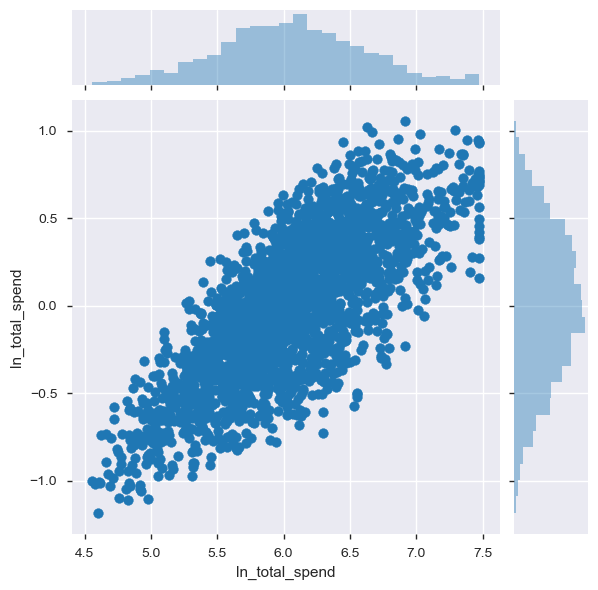

In [122]:
# Plot to visualize the distribution of residuals.
sns.jointplot(  train_y, residuals )

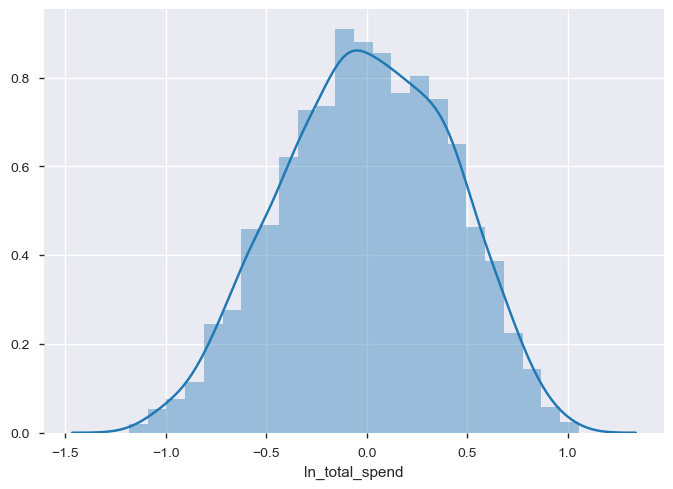

In [123]:
sns.distplot( residuals )

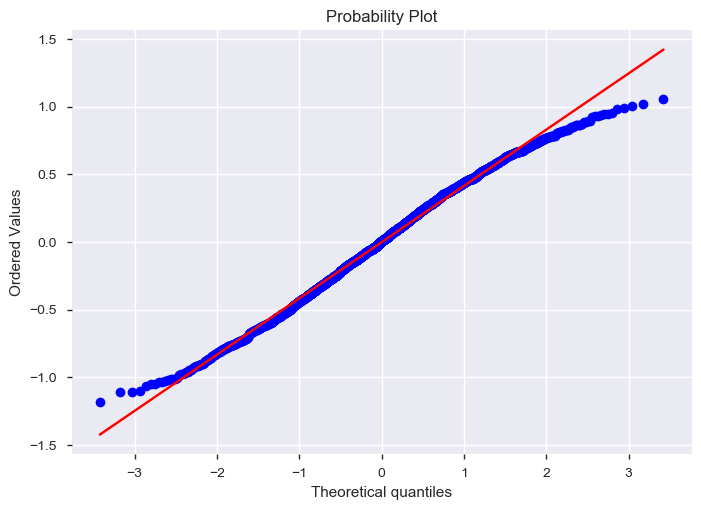

In [124]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [125]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [126]:
linreg = LinearRegression()

In [127]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

array([0.40726709, 0.41969918, 0.3874679 , 0.50767374, 0.35156596,
       0.42236208, 0.41260155, 0.3982908 , 0.35453213, 0.37357019])

In [128]:
# Mean r2 value after applying K-Fold cross validation.
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.4

### 3. Decision Tree:

In [129]:
from sklearn.tree import DecisionTreeRegressor
clf_dt=DecisionTreeRegressor()
clf_dt.fit(train_X, train_y)
y_pred_dt= clf_dt.predict(test_X)
acc_dt = round( clf_dt.score(test_X, test_y) * 100, 2)
print (str(-acc_dt) + ' percent')

31.32 percent


### Tuning Parameters

In [130]:
param_grid = {'max_depth': np.arange(3,8),
             'max_features': np.arange(6,15)}

In [131]:
from sklearn.model_selection import GridSearchCV
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [132]:
tree.best_score_

0.20038455136428848

In [133]:
tree.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=14,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [134]:
tree.best_params_

{'max_depth': 4, 'max_features': 14}

In [135]:
clf_tree = DecisionTreeRegressor( max_depth = 4, max_features=14)
clf_tree.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=14,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [136]:
acc_tree = round( clf_tree.score(test_X, test_y) * 100, 2)
print (str(-acc_dt) + ' percent')

31.32 percent


### Feature Importance

In [137]:
train_X.columns

Index(['addresscat', 'carbought_1', 'card2_2', 'card2_3', 'card2_4', 'card2_5',
       'card2benefit_3', 'card_2', 'card_3', 'card_4', 'card_5', 'cardmon',
       'cardtype_2', 'cartype_0', 'carvalue', 'debtinc', 'default_1',
       'ebill_1', 'edcat', 'empcat', 'gender_1', 'hometype_3', 'internet_3',
       'jobcat_5', 'jobsat', 'lncreddebt', 'lninc', 'othdebt', 'pets',
       'pets_reptiles', 'pets_saltfish', 'reason_2', 'reason_9', 'retire_1',
       'tenure', 'union_1'],
      dtype='object')

In [138]:
clf_tree.feature_importances_

array([0.009961  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02269191,
       0.        , 0.00971269, 0.        , 0.        , 0.19602551,
       0.00851754, 0.        , 0.        , 0.        , 0.01461038,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.63951471, 0.01419692, 0.        , 0.        ,
       0.        , 0.0688738 , 0.01589553, 0.        , 0.        ,
       0.        ])

In [139]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

[('addresscat', 0.009961000154088245),
 ('carbought_1', 0.0),
 ('card2_2', 0.0),
 ('card2_3', 0.0),
 ('card2_4', 0.0),
 ('card2_5', 0.0),
 ('card2benefit_3', 0.0),
 ('card_2', 0.0),
 ('card_3', 0.0),
 ('card_4', 0.02269191192066637),
 ('card_5', 0.0),
 ('cardmon', 0.00971268743295146),
 ('cardtype_2', 0.0),
 ('cartype_0', 0.0),
 ('carvalue', 0.19602551498834384),
 ('debtinc', 0.008517544266368497),
 ('default_1', 0.0),
 ('ebill_1', 0.0),
 ('edcat', 0.0),
 ('empcat', 0.014610377468192047),
 ('gender_1', 0.0),
 ('hometype_3', 0.0),
 ('internet_3', 0.0),
 ('jobcat_5', 0.0),
 ('jobsat', 0.0),
 ('lncreddebt', 0.0),
 ('lninc', 0.639514712703888),
 ('othdebt', 0.01419692053127823),
 ('pets', 0.0),
 ('pets_reptiles', 0.0),
 ('pets_saltfish', 0.0),
 ('reason_2', 0.06887379713091742),
 ('reason_9', 0.015895533403305732),
 ('retire_1', 0.0),
 ('tenure', 0.0),
 ('union_1', 0.0)]

### 4. KNN:

In [140]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg_knn = LinearRegression()
rfe = RFE(linreg_knn, 25)
rfe = rfe.fit(credit_card_new, credit_card_new['ln_total_spend'] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True  True  True  True  True  True False
  True False False False  True False False  True  True False  True  True
 False  True  True False False  True  True  True  True  True False  True
  True]
[ 1  1 10  1  1  1  1  1  1  1  1 13  1  4  2 11  1  7  5  1  1  3  1  1
  6  1  1  9 12  1  1  1  1  1  8  1  1]


In [141]:
print("Features sorted by their rank: ")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), credit_card_new.columns)))

Features sorted by their rank: 
[(1, 'addresscat'), (1, 'carbought_1'), (1, 'card2_3'), (1, 'card2_4'), (1, 'card2_5'), (1, 'card2benefit_3'), (1, 'card_2'), (1, 'card_3'), (1, 'card_4'), (1, 'card_5'), (1, 'cardtype_2'), (1, 'default_1'), (1, 'empcat'), (1, 'gender_1'), (1, 'internet_3'), (1, 'jobcat_5'), (1, 'ln_total_spend'), (1, 'lncreddebt'), (1, 'lninc'), (1, 'pets_reptiles'), (1, 'pets_saltfish'), (1, 'reason_2'), (1, 'reason_9'), (1, 'retire_1'), (1, 'union_1'), (2, 'carvalue'), (3, 'hometype_3'), (4, 'cartype_0'), (5, 'edcat'), (6, 'jobsat'), (7, 'ebill_1'), (8, 'tenure'), (9, 'othdebt'), (10, 'card2_2'), (11, 'debtinc'), (12, 'pets'), (13, 'cardmon')]


In [142]:
cols=['addresscat', 'carbought_1', 'card2_3', 'card2_4', 'card2_5', 'card2benefit_3', 'card_2', 
     'card_3', 'card_4', 'card_5', 'cardtype_2', 'default_1', 'empcat', 'gender_1', 'internet_3',
     'jobcat_5', 'lncreddebt', 'lninc', 'pets_reptiles', 'pets_saltfish', 'reason_2', 'reason_9',
     'retire_1', 'union_1'] 
X_knn=credit_card_new[cols]
y_knn=credit_card_new['ln_total_spend']

### Implementing the Model

In [143]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_scaled=pd.DataFrame(sc.fit_transform(X_knn))

X_scaled

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.721402,-0.686625,-0.618663,-0.543758,3.673248,-0.588436,-0.576427,1.779513,-0.606313,-0.216060,...,-0.368575,-0.315253,0.250460,-0.356249,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,2.369337
1,-1.721402,-0.686625,-0.618663,1.839054,-0.272239,1.699419,1.734827,-0.561951,-0.606313,-0.216060,...,-0.368575,-0.315253,0.264501,-1.339342,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,-0.422059
2,1.309235,-0.686625,-0.618663,1.839054,-0.272239,1.699419,1.734827,-0.561951,-0.606313,-0.216060,...,-0.368575,-0.315253,0.043286,-0.191897,-0.182940,-0.107632,3.708000,-2.067429,-0.416123,-0.422059
3,-0.963743,-0.686625,1.616390,-0.543758,-0.272239,-0.588436,1.734827,-0.561951,-0.606313,-0.216060,...,-0.368575,-0.315253,-2.637806,-0.949751,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,-0.422059
4,-0.963743,-0.686625,-0.618663,-0.543758,-0.272239,-0.588436,-0.576427,-0.561951,1.649314,-0.216060,...,2.713154,-0.315253,-1.136789,-0.760480,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,-0.422059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.551576,-0.686625,1.616390,-0.543758,-0.272239,-0.588436,-0.576427,-0.561951,-0.606313,-0.216060,...,-0.368575,-0.315253,1.771702,2.141142,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,-0.422059
4996,-0.206083,1.456399,-0.618663,-0.543758,3.673248,-0.588436,-0.576427,1.779513,-0.606313,-0.216060,...,-0.368575,-0.315253,1.073789,0.977479,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,-0.422059
4997,1.309235,1.456399,-0.618663,-0.543758,-0.272239,-0.588436,-0.576427,-0.561951,-0.606313,-0.216060,...,-0.368575,-0.315253,1.125444,1.334037,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,-0.422059
4998,0.551576,1.456399,-0.618663,1.839054,-0.272239,-0.588436,-0.576427,1.779513,-0.606313,-0.216060,...,2.713154,-0.315253,1.403118,2.091892,-0.182940,-0.107632,-0.269687,0.483693,-0.416123,-0.422059


In [144]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled, y_knn, test_size=0.3, random_state=0)

### KNN:

In [145]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [146]:
tuned_parameters = [{'n_neighbors': [21,23,25,27,29,31]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=5,
                   scoring='r2')

In [147]:
knn_reg.fit(X_train_knn, y_train_knn )

knn_reg.best_score_

0.20329135385332994

In [148]:
metrics.r2_score(y_train_knn, knn_reg.predict(X_train_knn))

0.257915766737577

In [149]:
knn_reg.best_params_

{'n_neighbors': 27}

In [150]:
#Building for the n_neighbors=27
knn_reg = KNeighborsRegressor( n_neighbors =27)

In [151]:
knn_reg.fit( X_train_knn, y_train_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                    weights='uniform')

In [152]:
metrics.r2_score(y_test_knn, knn_reg.predict(X_test_knn))

0.2162655440875766

### 5. SVR:

### Note: Since we have created scaled distribution of data so we are using same dataset for this model.

In [153]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_knn, y_train_knn)

C:\Users\nanda\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [154]:
metrics.r2_score(y_test_knn, regressor.predict(X_test_knn))

0.22832438737233018

In [155]:
# Final Conclusion:
# We are able to understand the major factors which are driving total credit card spend and got r2 value of around ~41% using 
# statistical model.
# Also, using ML models we are getting decent r2 value along with the important features which are drining total credit card spend.